## Importing libraries.

In [1]:
import numpy as np
import pickle
import cv2
from tqdm import tqdm_notebook
import os
import json

from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
%matplotlib inline

In [29]:
img_width = img_height = 512
num_channels = 1
root_path = "../Data/Roads/"
mode = 'train'

In [30]:
files = next(os.walk(root_path+mode+'/sat/'))[2]

In [36]:
all_masks = []
all_images = []

## Loading images and extracting masks.


Shape of Train Images = (759, 512, 512)
Shape of Train Labels = (759, 512, 512)


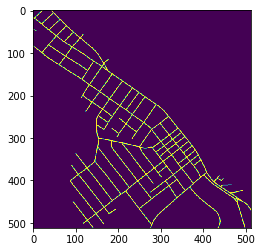

In [31]:
all_masks = []
all_images = []
 

for image_file in tqdm_notebook(files, total = len(files)):
    
    image_path = root_path+mode+'/sat/'+image_file
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (img_height, img_width), interpolation = cv2.INTER_AREA)
    #image = np.stack((image,)*1, axis=-1)
    all_images.append(image/255)
   
    
    
    mask_path = root_path+mode+'/map/'+image_file[:-1]
    mask = cv2.imread(mask_path, 0)
    mask = cv2.resize(mask, (img_height, img_width), interpolation = cv2.INTER_AREA)
    #mask  = np.stack((mask,)*1, axis=-1)
    all_masks.append(mask/255)
    
    
all_images = np.asarray(all_images)
all_masks = np.asarray(all_masks)

print("Shape of Train Images =", all_images.shape)
print("Shape of Train Labels =", all_masks.shape)


## Exporting masks and Images.

In [35]:
with open('../Data/Roads/Pickled_Images/Gray_'+mode+'_images.pickle', 'wb') as outfile:
    pickle.dump(all_images, outfile)
    
with open('../Data/Roads/Pickled_Images/Gray_'+mode+'_masks.pickle', 'wb') as outfile:
    pickle.dump(all_masks, outfile)
    
print("Data has been successfully exported.")

Data has been successfully exported.
